  StartingPop Prob_Extinction_Yr10 Prob_Extinction_Yr20
1           2                0.539                0.705
2          10                0.023                0.149


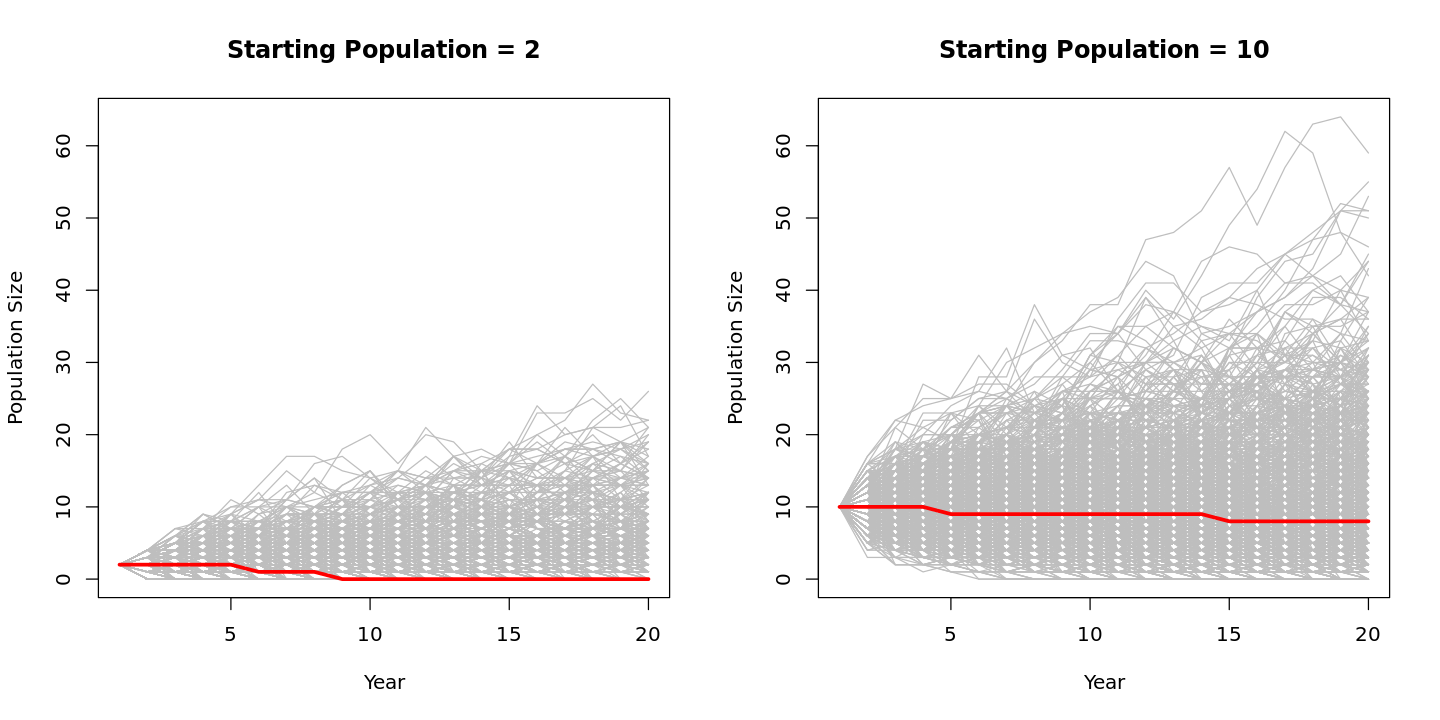

In [8]:
#####################################################################
##PVA - Illustrate effects of stochasticity on population persistence 

###Starting Population = 2 individuals
N2 <- 2

datN2 = data.frame(matrix(NA,nrow=20, ncol=1000))
datN2[1,] <- N2

for(i in seq(from=1, to=1000, by=1)){
  dn2 <- datN2[,i]
  
    for (i in seq(from=2, to=20, by = 1)){
      dn2[i] <- (rbinom(1,dn2[i-1],0.5)) + (rbinom(1,dn2[i-1],0.5))}
  
  datN2 = cbind(datN2,dn2)
  
}
datN2 <- datN2[,1001:2000]

###Starting Population = 10 individuals
N10 <- 10

datN10 = data.frame(matrix(NA,nrow=20, ncol=1000))
datN10[1,] <- N10

for(i in seq(from=1, to=1000, by=1)){
  dn10 <- datN10[,i]
  
  for (i in seq(from=2, to=20, by = 1)){
    dn10[i] <- (rbinom(1,dn10[i-1],0.5)) + (rbinom(1,dn10[i-1],0.5))}
  
  datN10 = cbind(datN10,dn10)
  
}
datN10 <- datN10[,1001:2000]

#Max y value for plots
MAX_N <- max(c(apply(datN2,1,max),apply(datN10,1,max)))

#Probability of extinction by Year 20
Ex2 <-data.frame(N2 = rowSums(datN2 == 0)/1000)
Ex10 <-data.frame(N10 = rowSums(datN10 == 0)/1000)
Extinction_Probability <- data.frame(StartingPop = c(2,10),
                                     Prob_Extinction_Yr10 = c(Ex2[10,1],Ex10[10,1]),
                                     Prob_Extinction_Yr20 = c(Ex2[20,1],Ex10[20,1]))


#####Plots
#prep for plots
datN2$MED <- apply(datN2,1,median)
datN2$Year <- seq(1:20)

datN10$MED <- apply(datN10,1,median)
datN10$Year <- seq(1:20)

#plot
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow=c(1,2))
#1
plot(datN2[,1]~Year, data=datN2, col="gray", ylab="Population Size", ylim=c(0,MAX_N), typ="l", main = "Starting Population = 2")
for(i in seq(1:1000)){
  lines(datN2[,i]~Year, data=datN2, col="gray")
}
lines(MED~Year, data=datN2, col="red", lwd=3)
#2
plot(datN10[,1]~Year, data=datN10, col="gray", ylab="Population Size", ylim=c(0,MAX_N), typ="l", main = "Starting Population = 10")
for(i in seq(1:1000)){
  lines(datN10[,i]~Year, data=datN10, col="gray")
}
lines(MED~Year, data=datN10, col="red", lwd=3)

print(Extinction_Probability)


  Tags Prob_Below_Threshold
1    0                0.000
2    5                0.103
3   10                0.778


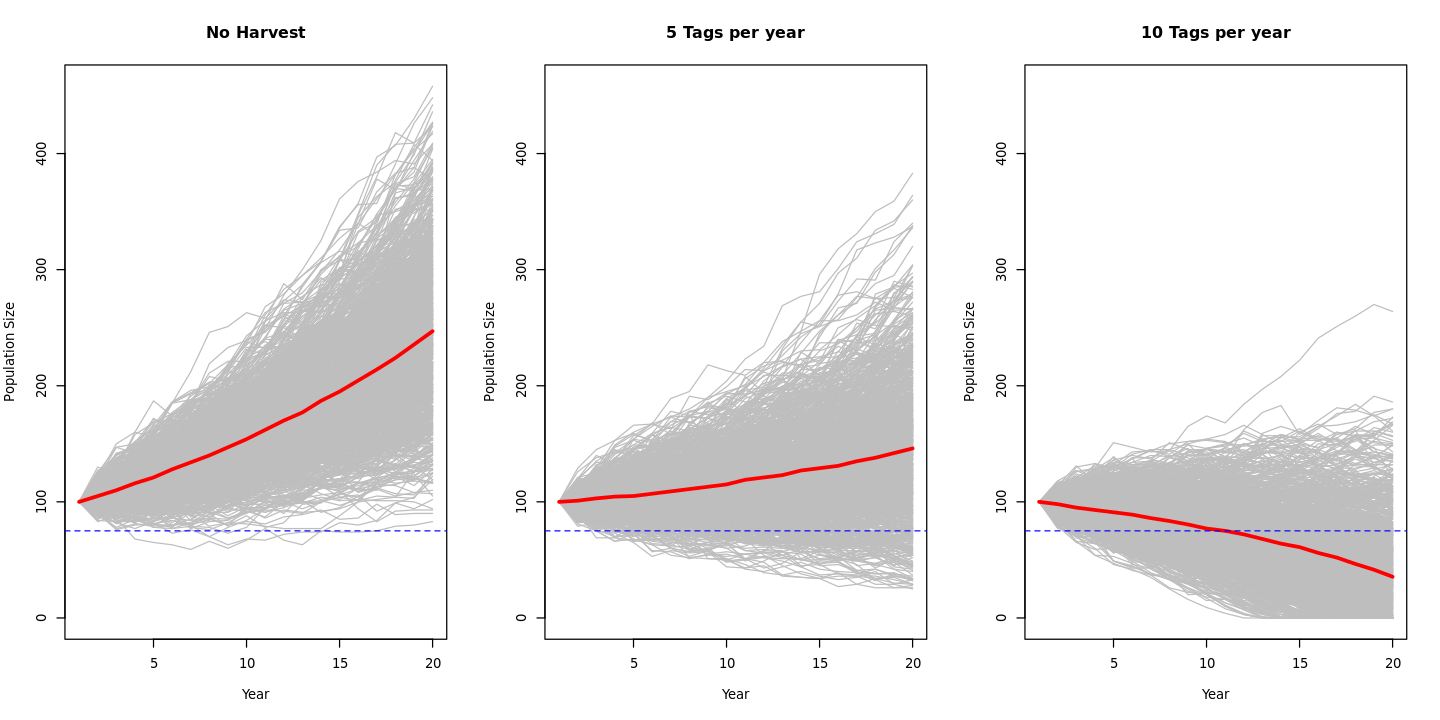

In [9]:
####################################################################################
###PVA for Harvest Management Scenarios#############################################

N <- 100
dat = data.frame(matrix(NA,nrow=20, ncol=1000))
dat[1,] <- N

### No tags
for(i in seq(from=1, to=1000, by=1)){
  d1 <- dat[,i]
  
  for (i in seq(from=2, to=20, by = 1)){
    B <- sum(rpois(d1[i-1], lambda = 0.5)) + d1[i-1]
    B1 <- B - 0
    B1 <- ifelse(B1 >= 0, B1, 0)
    d1[i] <- rbinom(1,B1,0.7)}
  
  dat = cbind(dat,d1)
}
dat1 <- dat[,1001:2000]

### 5 tags per year
N <- 100
dat = data.frame(matrix(NA,nrow=20, ncol=1000))
dat[1,] <- N

for(i in seq(from=1, to=1000, by=1)){
  d1 <- dat[,i]
  
  for (i in seq(from=2, to=20, by = 1)){
    B <- sum(rpois(d1[i-1], lambda = 0.5)) + d1[i-1]
    B1 <- B - 5
    B1 <- ifelse(B1 >= 0, B1, 0)
    d1[i] <- rbinom(1,B1,0.7)}
  
  dat = cbind(dat,d1)
}
dat2 <- dat[,1001:2000]

### 10 tags per year
N <- 100
dat = data.frame(matrix(NA,nrow=20, ncol=1000))
dat[1,] <- N

for(i in seq(from=1, to=1000, by=1)){
  d1 <- dat[,i]
  
  for (i in seq(from=2, to=20, by = 1)){
    B <- sum(rpois(d1[i-1], lambda = 0.5)) + d1[i-1]
    B1 <- B - 10
    B1 <- ifelse(B1 >= 0, B1, 0)
    d1[i] <- rbinom(1,B1,0.7)}
  
  dat = cbind(dat,d1)
}
dat3 <- dat[,1001:2000]

#Max y value for plots
MAX <- max(c(apply(dat1,1,max),apply(dat2,1,max),apply(dat2,1,max)))
#Probability of population falling below 75 individuals at year 20
#scenario
Below1 <-data.frame(tags_0 = rowSums(dat1<= 75)/1000)
Below2 <- data.frame(tags_5 = rowSums(dat2<= 75)/1000)
Below3 <- data.frame(tags_10 = rowSums(dat3<= 75)/1000)

PVA_Probability <- data.frame(Tags = c(0,5,10),
                                     Prob_Below_Threshold = c(Below1[20,1],Below2[20,1],Below3[20,1]))

#prep for plots
dat1$MED <- apply(dat1,1,median)
dat1$Year <- seq(1:20)

dat2$MED <- apply(dat2,1,median)
dat2$Year <- seq(1:20)

dat3$MED <- apply(dat3,1,median)
dat3$Year <- seq(1:20)

#plot
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow=c(1,3))
#1
plot(dat1[,1]~Year, data=dat1, col="gray", ylab="Population Size", ylim=c(0,MAX), typ="l", main = "No Harvest")
for(i in seq(1:1000)){
  lines(dat1[,i]~Year, data=dat1, col="gray")
}
lines(MED~Year, data=dat1, col="red", lwd=3)
abline(h = 75, lty="dashed", col="blue")
#2
plot(dat2[,1]~Year, data=dat2, col="gray", ylab="Population Size", ylim=c(0,MAX), typ="l", main = "5 Tags per year")
for(i in seq(1:1000)){
  lines(dat2[,i]~Year, data=dat2, col="gray")
}
lines(MED~Year, data=dat2, col="red", lwd=3)
abline(h = 75, lty="dashed", col="blue")
#3
plot(dat3[,1]~Year, data=dat3, col="gray", ylab="Population Size", ylim=c(0,MAX), typ="l", main = "10 Tags per year")
for(i in seq(1:1000)){
  lines(dat3[,i]~Year, data=dat3, col="gray")
}
lines(MED~Year, data=dat3, col="red", lwd=3)
abline(h = 75, lty="dashed", col="blue")

print(PVA_Probability)
